In [2]:
import pandas as pd
import networkx as nx
from tqdm import tqdm_notebook as tqdm


# ETH blocks

In [3]:
blocks=pd.read_csv("archive/blocks.csv",index_col=0)
blocks.head()

,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count
number,,,,,,,,,,,,,,,,,
9000000,0x388f34dd94b899f65bbd23006ee93d61434a2f2a5705...,0xdbfa2da5922a4833994af5016b5ccfb2e5a4838fb443...,0xc0bb87c0203c3709,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x40001000080800181008140500001854008901123400...,0xc357c22c4c9739ece996017524efb56bf7f5fe97a7ef...,0xd863e5b2ecf3dc0276aefe50762d39659811b1f10c91...,0x47aa6890ebab9253cf03286cb7b53edeec912c4032c8...,0x829bd824b016326a401d083b33d092293333a830,2573664196528490,13014076996386893192616,41360,0x7070796520e4b883e5bda9e7a59ee4bb99e9b1bc,9994051,9978336,1574706444,95
9000001,0x8992ef3955e5f793f0ad9a3ed97472b5330dbd25c92f...,0x388f34dd94b899f65bbd23006ee93d61434a2f2a5705...,0x21791ca8cacb9a8d,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x040012004080000b3018849002580ab53a843b881e00...,0x57569885299b578f72b6fb68f65eba60f34a1edcb8eb...,0xa1b25c6ee4076797eaf02dce863a13651a3738a04ff3...,0x33791066b327e40fd8495a40bd8f91eda4f8ad617426...,0x44fd3ab8381cc3d14afa7c4af7fd13cdc65026e1,2571425730493512,13014079567812623686128,34751,0x70707965207762,9984293,9937255,1574706479,119
9000002,0xd18199fd103a7d66f3d9726ecb57398697b9709bb867...,0x8992ef3955e5f793f0ad9a3ed97472b5330dbd25c92f...,0x09ff4acce3ff00fe,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x14000100000a00080000600480400d04420100c10200...,0x294823e1c8cb91a9a965d75c825b44bb1f9a9fd69ca1...,0x7c0c993f5807a4d94c4f06970e8aac10a1658e794a31...,0x0c7bd26b258bd0f0686531cdaf571d14eb09609281fc...,0xd7a15baeb7ea05c9660cbe03fb7999c2c2e57625,2572956187370423,13014082140768811056551,16998,0x50505945204143432d4d424c31,9974544,5583709,1574706486,69
9000003,0x1304ee0bed1e621b7de2d6b5749f46246d8985a1103c...,0xd18199fd103a7d66f3d9726ecb57398697b9709bb867...,0x20a20be01b3b275a,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x22000a200020d42c02aa2018240028f61248c4868439...,0xe207788e6a7f1c986ef2a91ef8895d2c1e7f6f85e9ee...,0x320207613356ee7fd8d63642b46af3b4a37e1d44b905...,0xba9a6856ce19c3619b3ef0a3c2bfbed1bbc7578c9613...,0xb2930b35844a230f00e51431acae96fe543a0347,2571974739014003,13014084712743550070554,33292,0x73656f32,9964840,9958654,1574706505,114
9000004,0xaa675351de9c1ce66f2f228f9a219f7df77e7bb678d5...,0x1304ee0bed1e621b7de2d6b5749f46246d8985a1103c...,0x48fc58c0000da500,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x264812c44212008c02d824142c0470b23a80dccd070d...,0xe98fe4155b199b92ef47ac416514f142cfc24a227c5c...,0xa7268bcc121953fa8a6aab3cf9837e86efaac5ad9d87...,0x4517a5b99c4af38250d1736198937b3f7c2862947092...,0xd224ca0c819e8e97ba0136b3b95ceff503b79f53,2570993769880413,13014087283737319950967,24413,0x7575706f6f6c2e636e2d3062386461326532,9955110,9953766,1574706523,142


# Create Bipartite Network

In [4]:
#generate nodes
blocks_=set(blocks.index)
miners_=set(blocks.miner)
print(len(blocks_)," Blocks")
print(len(miners_)," Miners")

439334  Blocks
186  Miners


In [5]:
Bi = nx.Graph()
Bi.add_nodes_from(miners_, bipartite=0)
Bi.add_nodes_from(blocks_, bipartite=1)

In [6]:
edges=[(blocks["miner"][block],block) for block in blocks.index]
len(edges)

439334

In [7]:
Bi.add_edges_from(edges,)

# Analyze the Bipartite Network

<AxesSubplot:>

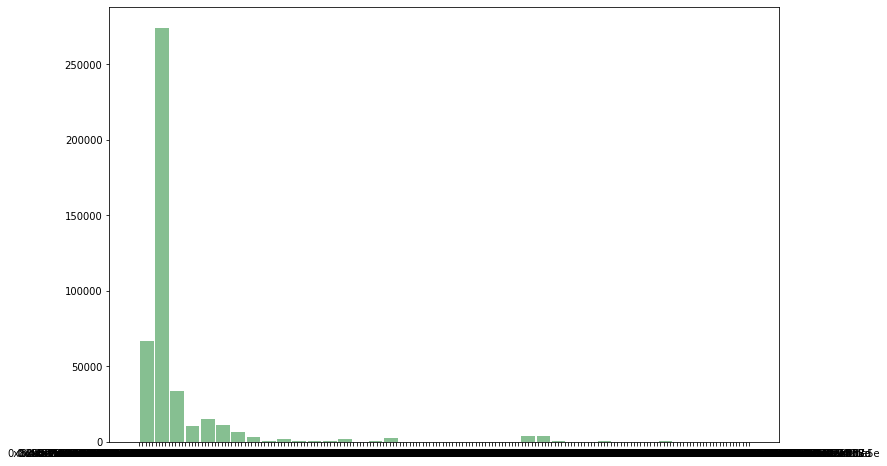

In [11]:
blocks["miner"].hist(bins=40,grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)